In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time
import numpy as np

In [25]:
from ML.GBR import GradientBoosting 
from help_function import cal_mean_squared_error
from help_function import cal_directional_accuracy
from help_function import cal_Tolerance_Based_accuracy

In [26]:
# Load the dataset
train_file_path = "./datasets/Train_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
train_data = pd.read_csv(train_file_path)

test_file_path = "./datasets/Test_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
test_data = pd.read_csv(test_file_path)

In [27]:
#Define levels
levels=5

# Parse relevant columns for all bid and ask levels
# bid_columns = [f"bids[{i}].price" for i in range(levels)] + [f"bids[{i}].amount" for i in range(levels)]
# ask_columns = [f"asks[{i}].price" for i in range(levels)] + [f"asks[{i}].amount" for i in range(levels)]
bid_columns = [f"bids[{i}].price" for i in range(levels)]
ask_columns = [f"asks[{i}].price" for i in range(levels)]
feature_columns = bid_columns  + ask_columns

# AdaBoost only predicts a single output

target_columns=['next_1st_mark_price']
eval_columns=target_columns+ ["mark_price",'1st_Price_Movement',"1st_actual_direction"]

# Features and target
X_train = train_data[feature_columns]
y_train = train_data['next_1st_mark_price']
X_test = test_data[feature_columns]
y_test = test_data[eval_columns]
# X_eval = eval_data[feature_columns]

# y_eval = eval_data[eval_columns]

In [28]:
X_test

,bids[0].price,bids[1].price,bids[2].price,bids[3].price,bids[4].price,asks[0].price,asks[1].price,asks[2].price,asks[3].price,asks[4].price
0,57708.0,57699.5,57699.0,57696.0,57693.5,57708.5,57712.0,57712.5,57713.0,57713.5
1,57708.0,57702.5,57699.5,57699.0,57696.0,57708.5,57712.0,57714.0,57714.5,57717.0
2,57699.0,57696.0,57686.0,57683.0,57681.5,57699.5,57700.0,57702.0,57702.5,57703.0
3,57699.0,57696.0,57686.0,57683.0,57681.5,57699.5,57700.0,57702.0,57702.5,57703.0
4,57699.0,57696.0,57686.0,57683.0,57681.5,57699.5,57700.0,57702.0,57702.5,57703.0
...,...,...,...,...,...,...,...,...,...,...
103675,58247.0,58240.5,58239.5,58239.0,58235.5,58247.5,58248.0,58251.0,58261.0,58261.5
103676,58247.0,58242.5,58240.5,58239.0,58238.0,58247.5,58248.0,58251.0,58260.5,58261.0
103677,58247.0,58242.5,58240.5,58239.0,58238.5,58247.5,58248.0,58251.0,58260.5,58261.0
103678,58247.0,58242.5,58240.5,58239.0,58238.0,58247.5,58248.0,58251.0,58260.5,58261.0


In [29]:
GradientBoostingRegressor=GradientBoosting(X_train,y_train,X_test)

In [30]:
# if not yet trained
# GradientBoostingRegressor.train()

In [31]:
# Find the best parameter 
# GradientBoostingRegressor.findparameter()

In [32]:
# Predict 
# Measure the execution time of the function
start_time = time.time()
result=GradientBoostingRegressor.predict()
end_time = time.time()
execution_time = (end_time - start_time)* 1000 
print(f"Execution_time(Gradient Boosting): {execution_time:.2f} milliseconds")

Execution_time(Gradient Boosting): 53.45 milliseconds


In [33]:
eval_np_array= np.array(y_test[['next_1st_mark_price',"1st_actual_direction"]])


In [34]:
# Evaluate performance using MSE on evaluation set
mse_GBR = cal_mean_squared_error(eval_np_array[:,0], result)
print(f"MSE (Gradient Boosting): {mse_GBR}")

MSE (Gradient Boosting): [22.56034521]


In [35]:
# Calculate directional accuracy
result_sign = np.sign(result - eval_np_array[:,0])
directional_accuracy_GBR=cal_directional_accuracy(eval_np_array[:,1],result_sign)
print(f"Directional Accuracy (Gradient Boosting): {directional_accuracy_GBR}")

Directional Accuracy (Gradient Boosting): [0.25652971]


In [36]:
# Calculate tolerance-based accuracy
tolerance_accuracy_GBR  = cal_Tolerance_Based_accuracy(eval_np_array[:,0], result)
print(f"Tolerance-Based Accuracy (Gradient Boosting): {tolerance_accuracy_GBR}")

Tolerance-Based Accuracy (Gradient Boosting): [0.80574846]


In [37]:
GBR_Predict_data=pd.DataFrame({"predicted_next_1st_mark_price":result
                                            #  "predicted_next_2nd_mark_price":result[:,1],
                                            })

In [38]:
AdaBoost_Performance=pd.DataFrame({"model": "Gradient Boosting",
                                            "1st_mark_price_mse_GBR": mse_GBR[0],
                                             "1st_mark_price_tolerance_GBR": tolerance_accuracy_GBR[0],
                                             "1st_mark_price_directional_GBR": directional_accuracy_GBR[0],      
                                            #  "2nd_mark_price_mse_GBR": mse_GBR[1],
                                            #  "2nd_mark_price_tolerance_accuracy_GBR": tolerance_accuracy_GBR[1],
                                            #  "2nd_mark_price_directional_accuracy_GBR": tolerance_accuracy_GBR[1],
                                             "execution_time":execution_time}, index=[0])

In [39]:
Evaluate_result=pd.concat([y_test, GBR_Predict_data], axis=1)

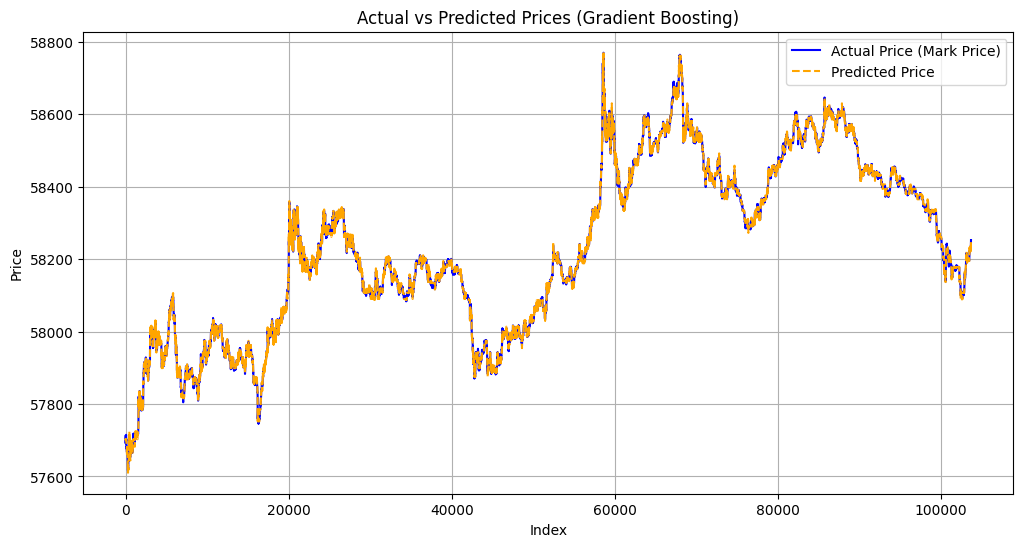

In [40]:
# Visualize the actual vs. predicted price along with signals
plt.figure(figsize=(12, 6))
plt.plot(Evaluate_result["next_1st_mark_price"], label="Actual Price (Mark Price)", color="blue")
plt.plot(Evaluate_result["predicted_next_1st_mark_price"], label="Predicted Price", color="orange", linestyle="--")
plt.title("Actual vs Predicted Prices (Gradient Boosting)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()